We have been exploring computer vision with fastai and pytorch. Today, we will go over something different, which is natural language processing (NLP). We will briefly look at how to train NLP with FastAI by making a simple movie review classification using FastAI. 

In [1]:
!pip install -Uqq fastbook

     |████████████████████████████████| 720 kB 5.5 MB/s 
     |████████████████████████████████| 186 kB 42.4 MB/s 
     |████████████████████████████████| 46 kB 2.4 MB/s 
     |████████████████████████████████| 1.2 MB 35.5 MB/s 
     |████████████████████████████████| 56 kB 3.4 MB/s 
     |████████████████████████████████| 51 kB 286 kB/s 


In [2]:
from fastai.text.all import *

Images are composed of pixels, which are numbers. On the other hand, languages are not numbers in nature. In order to train our model with deep learning, we have to turn those words into computable numbers. So, we turn a sequence of words into a sequence of numbers. Because we are using FastAI, texts are converted into numbers automatically if use `TextBlock`. 

In [3]:
path = untar_data(URLs.IMDB)

In [4]:
dls_clas = DataBlock(
    blocks=(TextBlock.from_folder(path), CategoryBlock),
    get_y=parent_label,
    get_items=partial(get_text_files, folders=['train', 'test']),
    splitter=GrandparentSplitter(valid_name='test')).dataloaders(path, path=path, bs=64, seq_len=80)

As you can see, it takes a while (it took me about 5 mins on colab) to transform words into numbers because FastAI has to read through all the words and count the frequencies. Good news is that we do not have to go through that process again as FastAI saved the result in a temporary file. 

Now, we have a datablock. We can use it as the same way as we used before. Let's look at a each batch. As we can see, each item has a label of `pos` or `neg`. We will train a model that reads a movie review and figures out whether it is a positive review or a negative review.

In [5]:
dls_clas.show_batch()

,text,category
0,"xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules of the match , both opponents have to go through tables in order to get the win . xxmaj benoit and xxmaj guerrero heated up early on by taking turns hammering first xxmaj spike and then xxmaj bubba xxmaj ray . a xxmaj german xxunk by xxmaj benoit to xxmaj bubba took the wind out of the xxmaj dudley brother . xxmaj spike tried to help his brother , but the referee restrained him while xxmaj benoit and xxmaj guerrero",pos
1,"xxbos * * attention xxmaj spoilers * * \n\n xxmaj first of all , let me say that xxmaj rob xxmaj roy is one of the best films of the 90 's . xxmaj it was an amazing achievement for all those involved , especially the acting of xxmaj liam xxmaj neeson , xxmaj jessica xxmaj lange , xxmaj john xxmaj hurt , xxmaj brian xxmaj cox , and xxmaj tim xxmaj roth . xxmaj michael xxmaj canton xxmaj jones painted a wonderful portrait of the honor and dishonor that men can represent in themselves . xxmaj but alas … \n\n it constantly , and unfairly gets compared to "" braveheart "" . xxmaj these are two entirely different films , probably only similar in the fact that they are both about xxmaj scots in historical xxmaj scotland . xxmaj yet , this comparison frequently bothers me because it seems",pos
2,"xxbos xxmaj by now you 've probably heard a bit about the new xxmaj disney dub of xxmaj miyazaki 's classic film , xxmaj laputa : xxmaj castle xxmaj in xxmaj the xxmaj sky . xxmaj during late summer of 1998 , xxmaj disney released "" kiki 's xxmaj delivery xxmaj service "" on video which included a preview of the xxmaj laputa dub saying it was due out in "" 1 xxrep 3 9 "" . xxmaj it 's obviously way past that year now , but the dub has been finally completed . xxmaj and it 's not "" laputa : xxmaj castle xxmaj in xxmaj the xxmaj sky "" , just "" castle xxmaj in xxmaj the xxmaj sky "" for the dub , since xxmaj laputa is not such a nice word in xxmaj spanish ( even though they use the word xxmaj laputa many times",pos
3,"xxbos xxmaj warning : xxmaj does contain spoilers . \n\n xxmaj open xxmaj your xxmaj eyes \n\n xxmaj if you have not seen this film and plan on doing so , just stop reading here and take my word for it . xxmaj you have to see this film . i have seen it four times so far and i still have n't made up my mind as to what exactly happened in the film . xxmaj that is all i am going to say because if you have not seen this film , then stop reading right now . \n\n xxmaj if you are still reading then i am going to pose some questions to you and maybe if anyone has any answers you can email me and let me know what you think . \n\n i remember my xxmaj grade 11 xxmaj english teacher quite well . xxmaj",pos
4,"xxbos xxmaj polish film maker xxmaj walerian xxmaj borowczyk 's xxmaj la xxmaj bête ( french , 1975 , aka xxmaj the xxmaj beast ) is among the most controversial and brave films ever made and a very excellent one too . xxmaj this film tells everything that 's generally been hidden and denied about our nature and our sexual nature in particular with the symbolism and silence of its images . xxmaj the images may look wild , perverse , "" sick "" or exciting , but they are all in relation with the lastly mentioned . xxmaj sex , desire and death are very strong and primary things and dominate all the flesh that has a human soul inside it . xxmaj they interest and xxunk us so powerfully ( and by our nature ) that they are considered scary , unacceptable and something too wild to be",pos
5,"xxbos xxmaj berlin - born in 1942 xxmaj margarethe von xxmaj trotta was an actress and now she is a very important director and 

Let's make a model with `text_classifier_learner` and see how it trains. 

In [6]:
learn = text_classifier_learner(dls_clas, 
                                AWD_LSTM, 
                                drop_mult=0.5,
                                metrics=accuracy)

SuggestedLRs(valley=0.002511886414140463)

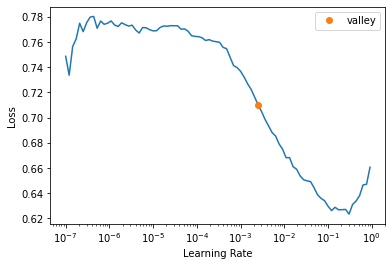

In [7]:
learn.lr_find()

In [8]:
learn.fit_one_cycle(3, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.453829,0.385983,0.828360,07:43
1,0.432187,0.369330,0.836160,07:43
2,0.413031,0.361472,0.841440,07:43


It is training well. Let's train a bit more.

In [9]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.415325,0.356431,0.844840,07:43
1,0.430957,0.368306,0.838840,07:42
2,0.424710,0.353693,0.846600,07:43
3,0.404202,0.342196,0.851920,07:44
4,0.401973,0.343825,0.850280,07:43


Let's try our input and see whether it can figure out my movie reviews.

In [11]:
learn.predict('This movie is awsome.')

('pos', tensor(1), tensor([0.0855, 0.9145]))

In [15]:
learn.predict('Frodo is very brave. He managed to destroy the ring.')

('pos', tensor(1), tensor([0.3413, 0.6587]))

In [16]:
learn.predict('Most people would love this movie because of its awsome computer graphics, but I did not like it.')

('neg', tensor(0), tensor([0.6328, 0.3672]))

This seems good. Let's try setences that do not relate to movies. See what it does.

In [17]:
learn.predict('I hate my shoes.')

('neg', tensor(0), tensor([0.6695, 0.3305]))

In [19]:
learn.predict('We have been exploring computer vision with fastai and pytorch.' + 
              'Today, we will go over something different, which is natural ' +
              'language processing (NLP). We will briefly look at how to train' +
              'NLP with FastAI by making a simple movie review classification using FastAI.')

('pos', tensor(1), tensor([0.0799, 0.9201]))

Not only is our model able to classify movie reviews, but also general tone of the texts. In other words, our model has a "gut feeling" now. It knows when someone is happy or mad in a fundamental level. This is very amazing for a model that we trained for about an hour. Try to type something in and see for yourself!

We were able to reach 85% accuracy with very little code and time. We can do better if we train our train our model on the whole IMDB dataset to just get to know the vocabulary before going into a classification problem. We will do that next time by digging deeper into what is going on under the hood. 